## Importing Libraries and Data reading 

In [1]:
#Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#preprocessing library and dependencies
import time
import nltk
import re
import gensim
from nltk.stem.snowball import SnowballStemmer
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.preprocessing import LabelEncoder 
from wordcloud import WordCloud
import pandas_profiling as pp
#evaluation and vectorization dependencies
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,log_loss,accuracy_score
from sklearn.model_selection import train_test_split
#models
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
fake= pd.read_csv('/content/Fake.csv')
true=pd.read_csv('/content/True.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
print('fake :\t',fake.shape)
print('true :\t',true.shape)

fake :	 (23481, 4)
true :	 (21417, 4)


Creating Profile Reports :

In [6]:
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pp.ProfileReport(fake)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
pp.ProfileReport(true)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Have to drop the duplicated rows.

In [9]:
fake.drop_duplicates(inplace=True)

In [10]:
fake.duplicated().sum()

0

In [11]:
true.drop_duplicates(inplace=True)

In [12]:
true.duplicated().sum()

0

In [13]:
true.shape , fake.shape

((21211, 4), (23478, 4))

In [14]:
#Creating Class Labels:
fake['class'] = 0
true['class'] = 1

## Data Visualization:

Creating WordClouds for the most frequent words in Fake and True Datasets.

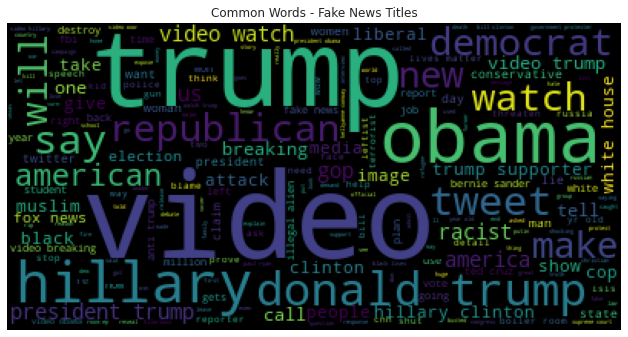

In [15]:
# Word cloud visualization for fake words
fake_words = ''

for headline in fake['title']:
    text = headline.lower() # all letters in healine lowercase
    fake_words = fake_words + text + ' ' # Concatenates every single headline into one string

fake_wordcloud = WordCloud().generate(fake_words)

plt.figure(figsize=(11,6))
plt.title("Common Words - Fake News Titles")
plt.imshow(fake_wordcloud)
plt.axis('off');

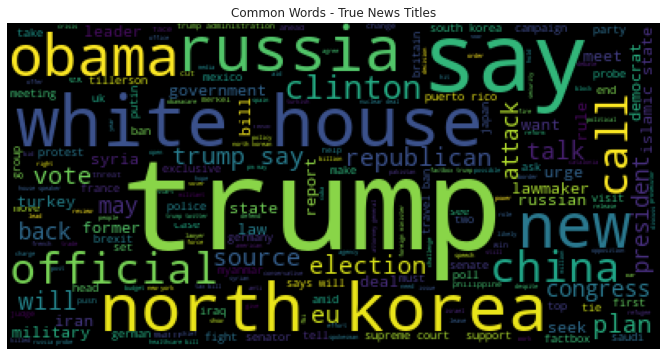

In [16]:
# Word cloud visualization for true words
real_words = ''

for headline in true['title']:
    text = headline.lower()
    real_words = real_words + text + ' '
    
   
real_wordcloud = WordCloud().generate(real_words)

plt.figure(figsize=(12,6))
plt.title("Common Words - True News Titles")
plt.imshow(real_wordcloud)
plt.axis('off');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SUBJECTS OF FAKE NEWS')

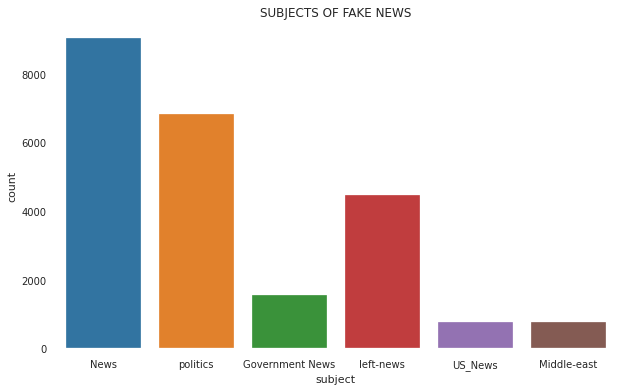

In [17]:
plt.figure(figsize=(10,6))
sns.countplot('subject',data=fake)
plt.title('SUBJECTS OF FAKE NEWS')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SUBJECTS OF TRUE NEWS')

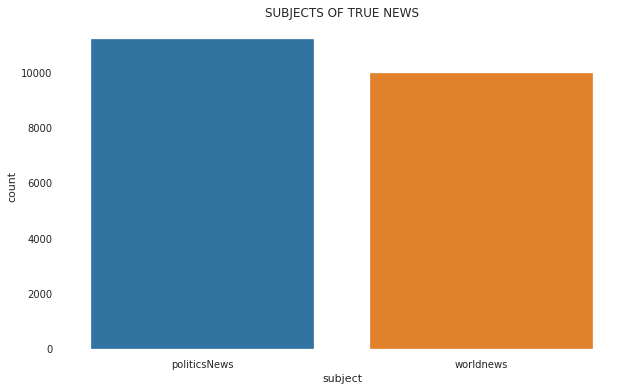

In [18]:
plt.figure(figsize=(10,6))
sns.countplot('subject',data=true)
plt.title('SUBJECTS OF TRUE NEWS')

In [19]:
data = pd.concat([fake,true],axis=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [20]:
data = data.reset_index(drop=True)
data = data.drop('date',axis=1)
data.head()

,title,text,subject,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


### Text Preprocessing:

In [21]:
def remove_shortforms(phrase):
  phrase= re.sub(r"won't","will not", phrase)
  phrase= re.sub(r"can't","can not", phrase)

  #general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

def remove_special_char(text):
  text = re.sub('[^A-Za-z0-9]+'," ",text)
  return text

def remove_wordswithnum(text):
  text= re.sub("\S*\d\S*", "", text).strip()
  return text

def lowercase(text):
  text= text.lower()
  return text

def remove_stop_words(text):
  text= remove_stopwords(text)
  return text

st= SnowballStemmer(language='english')
def stemming(text):
  r=[]
  for word in text:
    a=st.stem(word)
    r.append(a)
  return r

def listToString(s):
  str1=" "
  return(str1.join(s))

In [22]:
start_time = time.time()
for i in range(len(data['text'])):
    data['text'][i] = remove_shortforms(data['text'][i])
    data['text'][i] = remove_special_char(data['text'][i])
    data['text'][i] = remove_wordswithnum(data['text'][i])
    data['text'][i] = lowercase(data['text'][i])
    data['text'][i] = remove_stop_words(data['text'][i])
    text = data['text'][i]
    text = text.split()
    data['text'][i] = stemming(text)
    s = data['text'][i]
    data['text'][i] = listToString(s)
print("Time taken to preprocess : ",time.time()-start_time," seconds")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Time taken to preprocess :  532.1041159629822  seconds


In [23]:
start_time = time.time()
for i in range(len(data['title'])):
    data['title'][i] = remove_shortforms(data['title'][i])
    data['title'][i] = remove_special_char(data['title'][i])
    data['title'][i] = remove_wordswithnum(data['title'][i])
    data['title'][i] = lowercase(data['title'][i])
    data['title'][i] = remove_stop_words(data['title'][i])
    text = data['title'][i]
    text = text.split()
    data['title'][i] = stemming(text)
    s = data['title'][i]
    data['title'][i] = listToString(s)
print("Time taken to preprocess : ",time.time()-start_time," seconds")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Time taken to preprocess :  237.35425329208374  seconds


In [24]:
start_time = time.time()
for i in range(len(data['subject'])):
    data['subject'][i] = remove_shortforms(data['subject'][i])
    data['subject'][i] = remove_special_char(data['subject'][i])
    data['subject'][i] = remove_wordswithnum(data['subject'][i])
    data['subject'][i] = lowercase(data['subject'][i])
    data['subject'][i] = remove_stop_words(data['subject'][i])
    text = data['subject'][i]
    text = text.split()
    data['subject'][i] = stemming(text)
    s = data['subject'][i]
    data['subject'][i] = listToString(s)
print("Time taken to preprocess : ",time.time()-start_time," seconds")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Time taken to preprocess :  225.859379529953  seconds


In [25]:
data.head()

,title,text,subject,class
0,donald trump send embarrass new year s eve mes...,donald trump couldn t wish american happi new ...,news,0
1,drunk brag trump staffer start russian collus ...,hous intellig committe chairman devin nune go ...,news,0
2,sheriff david clark internet joke threaten pok...,friday reveal milwauke sheriff david clark con...,news,0
3,trump obsess obama s code websit imag,christma day donald trump announc work follow ...,news,0
4,pope franci call donald trump christma speech,pope franci annual christma day messag rebuk d...,news,0


Combining text,title and subject into one column and dropping the indivual columns.

In [26]:
Combined_text = [None] * len(data['text'])
for i in range(len(data['title'])):
  Combined_text[i]= data['text'][i] + " " + data['title'][i] + " " + data['subject'][i]

data['combined_text'] = Combined_text

In [27]:
#dropping the unnecessary columns
data = pd.DataFrame.drop(data,columns=['title','text','subject'],axis=1)
data.head()

,class,combined_text
0,0,donald trump couldn t wish american happi new ...
1,0,hous intellig committe chairman devin nune go ...
2,0,friday reveal milwauke sheriff david clark con...
3,0,christma day donald trump announc work follow ...
4,0,pope franci annual christma day messag rebuk d...


In [28]:
data['combined_text'][6788]

'stephen colbert hit nail right head sure touch conserv nerv littl ditti treasuri s announc d put harriet tubman colbert start point remov indian stabber ummm nativ american stabber andrew jackson jackson consid kind slave owner gave near human be kept shackl own place sleep food allow women children brainer peopl babi free slave jackson s rise presid begin democrat parti oppos lincoln ultim seced union colbert bit poke fun found slave owner own peopl jackson particular preserv person slave count census gave south s big plantat enorm block vote power state tubman feel carri like washington jefferson colbert brought gender pay gap note woman worth dig conserv moment tri fire racist countri congression district t like left decis make process import thing deni african american heritag role american histori rememb peopl oppos black histori month month white racism plain simpl thing peopl rememb tubman s debut sad true featur imag screen captur colbert s rundown harriet tubman news gonna pi

## Text-Vectorization:

**BAG OF WORDS and TF-IDF VECTORIZATION of the combined text**

In [29]:
bow= CountVectorizer(ngram_range=(1,2))
bow_text= bow.fit_transform(data['combined_text'])

In [30]:
tfidf= TfidfVectorizer(ngram_range=(1,2))
tfidf_text= tfidf.fit_transform(data['combined_text'])

In [31]:
print(bow_text.shape)
print(tfidf_text.shape)

(44689, 3015888)
(44689, 3015888)


## Train-Test Split 

In [32]:
labels=data['class'].reset_index(drop=True)
labels.shape

(44689,)

In [33]:
X_train_bow,X_test_bow,Y_train,Y_test= train_test_split(bow_text,labels,test_size=0.2,random_state=42)
X_train_tfidf,X_test_tfidf,Y_traint,Y_testt= train_test_split(tfidf_text,labels,test_size=0.2,random_state=42)

Splitted data visualization:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


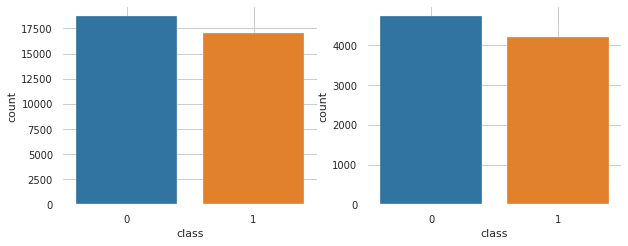

In [34]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.countplot(Y_train)
plt.grid()

plt.subplot(2,2,2)
sns.countplot(Y_test)
plt.grid()

plt.show()

Confusion matrix along with Precision and Recall matrix

In [35]:
def plot_conf_matrix(Y_test,Y_pred):
  conf = confusion_matrix(Y_test,Y_pred)
  recall = (((conf.T)/(conf.sum(axis=1))).T)
  precision = (conf/conf.sum(axis=0))

  class_labels= [0,1]

  #confusion matrix plotting
  plt.figure(figsize=(10,6))
  sns.heatmap(conf,annot=True,fmt=".3f",cmap="winter",
              xticklabels=class_labels,yticklabels=class_labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

  #Precision matrix plotting
  plt.figure(figsize=(10,6))
  sns.heatmap(precision,annot=True,fmt=".3f",cmap="winter",
              xticklabels=class_labels,yticklabels=class_labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original  Class')
  plt.show()

  #Recall matrix plotting
  plt.figure(figsize=(10,6))
  sns.heatmap(recall,annot=True,fmt=".3f",cmap="winter",
              xticklabels=class_labels,yticklabels=class_labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

## ML Models:

In [36]:
summary= []

* #### Logistic Regression :

With BagofWords encoding:

The training loss is :  9.992007221626413e-16
The testing loss is :  0.06569308524228036


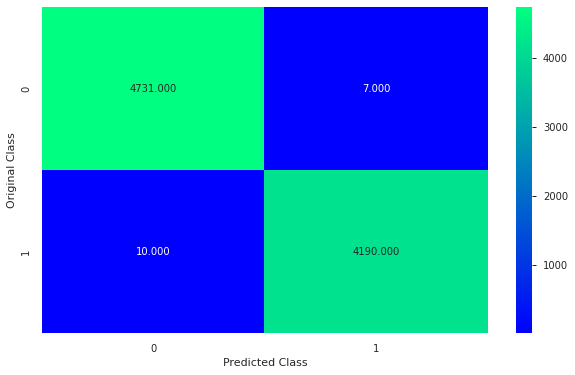

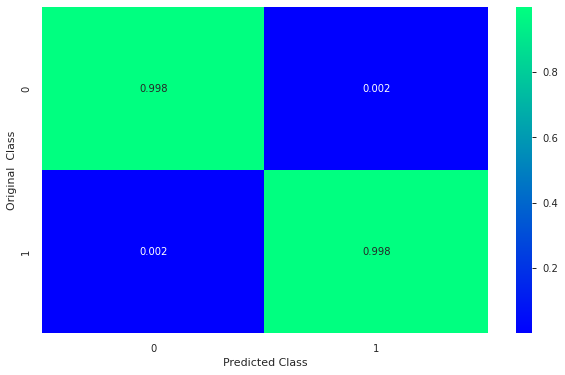

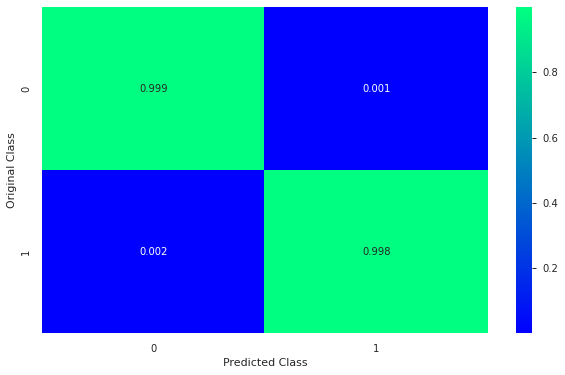

Accuracy: 99.80980085030208


In [37]:
lr=LogisticRegression(max_iter=1200)
lr.fit(X_train_bow,Y_train)

train_pred= lr.predict(X_train_bow)
print("The training loss is : ", log_loss(Y_train,train_pred))

test_pred= lr.predict(X_test_bow)
print("The testing loss is : ", log_loss(Y_test,test_pred))

plot_conf_matrix(Y_test,test_pred)
print("Accuracy:",lr.score(X_test_bow,Y_test)*100)

summary.append(("Logistic Regression with BoW ",lr.score(X_test_bow,Y_test)*100))

With TF-TDF encoding of text :

The train loss is :  0.17486501879162314
The test loss is :  0.36324468147303324


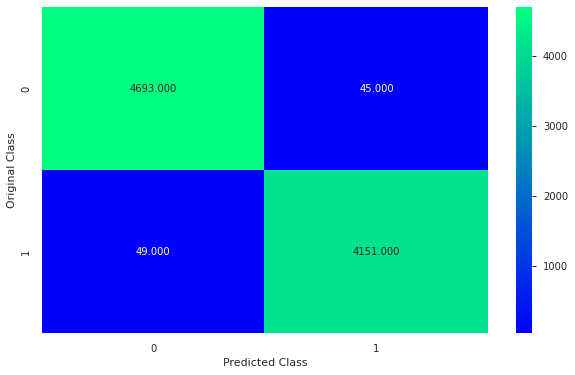

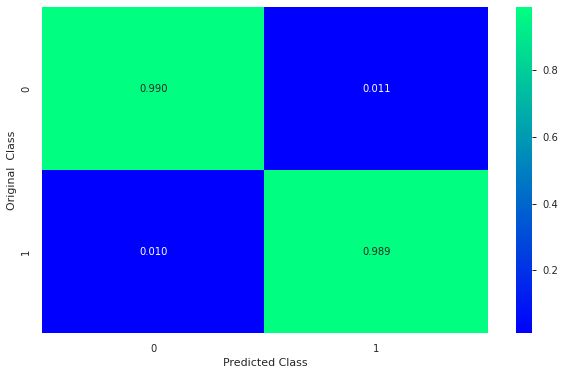

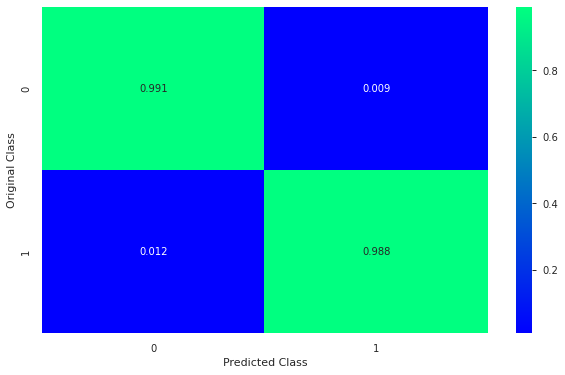

Accuracy : 98.94831058402328


In [38]:
lr = LogisticRegression(max_iter=1200)
lr.fit(X_train_tfidf,Y_traint)

train_pred = lr.predict(X_train_tfidf)
print("The train loss is : ",log_loss(Y_traint,train_pred))

test_pred = lr.predict(X_test_tfidf)
print("The test loss is : ",log_loss(Y_testt,test_pred))

plot_conf_matrix(Y_testt,test_pred)
print("Accuracy :",lr.score(X_test_tfidf,Y_testt)*100)

summary.append(("Logistic Regression with TF-IDF",lr.score(X_test_tfidf,Y_testt)*100))

* ### Random Forest

With BagofWords encoding of text:

The train loss is :  9.992007221626413e-16
The test loss is :  0.2936872444750657


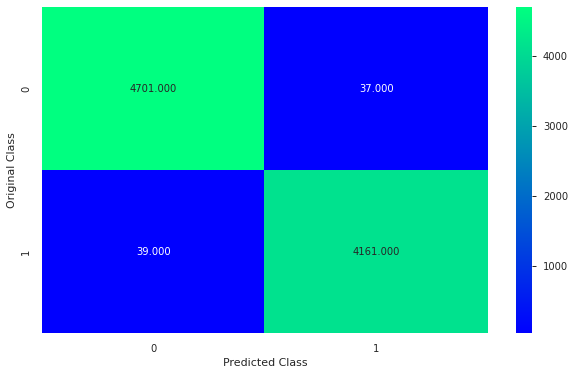

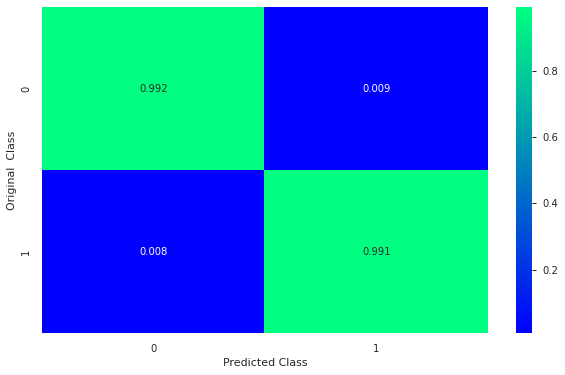

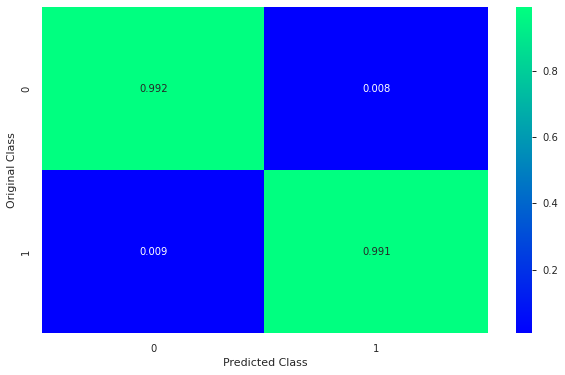

ACCURACY :  99.14969791899753


In [39]:
rf= RandomForestClassifier()
rf.fit(X_train_bow,Y_train)

train_pred= rf.predict(X_train_bow)
print("The train loss is : ",log_loss(Y_train,train_pred))

test_pred= rf.predict(X_test_bow)
print("The test loss is : ", log_loss(Y_test,test_pred))

plot_conf_matrix(Y_test,test_pred)

print("ACCURACY : ",accuracy_score(Y_test,test_pred)*100)

summary.append(("Random Forest with BoW ",accuracy_score(Y_test,test_pred)*100))

With TF-IDF encoding of text:

The train loss is :  9.992007221626413e-16
The test loss is :  0.2705018496244724


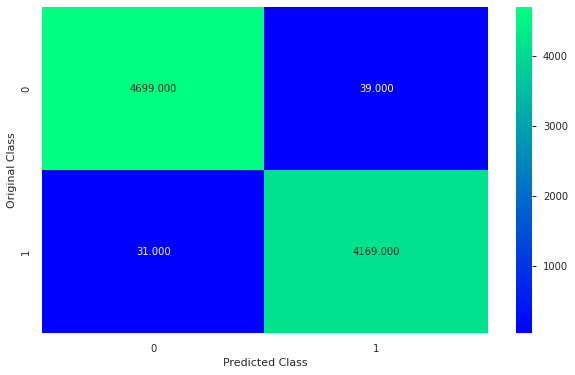

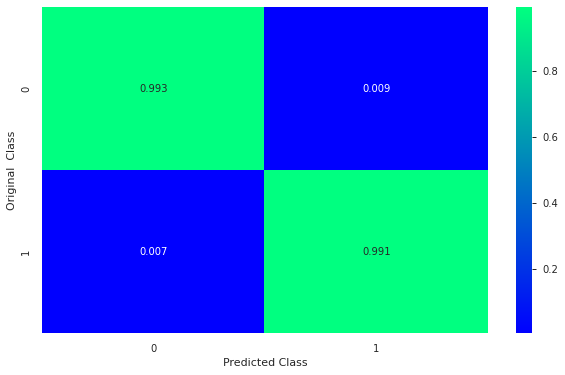

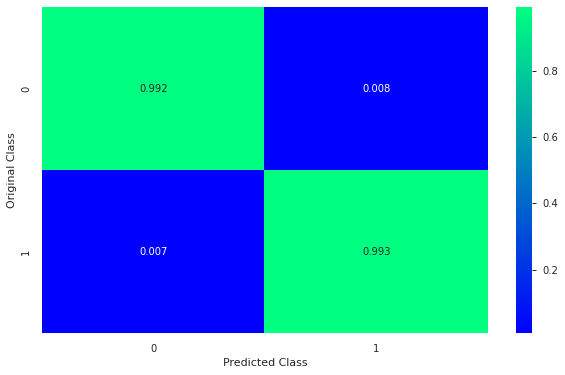

Accuracy :  99.21682703065564


In [40]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,Y_traint)

train_pred = rf.predict(X_train_tfidf)
print("The train loss is : ",log_loss(Y_traint,train_pred))

test_pred = rf.predict(X_test_tfidf)
print("The test loss is : ",log_loss(Y_testt,test_pred))

plot_conf_matrix(Y_testt,test_pred)
print("Accuracy : ",accuracy_score(Y_testt,test_pred)*100)

summary.append(("Random Forest with TF-IDF",accuracy_score(Y_testt,test_pred)*100))

* ### SVM :

With BagofWords encoding of text:

The train loss is :  9.992007221626413e-16
The test loss is :  0.04637168430560732


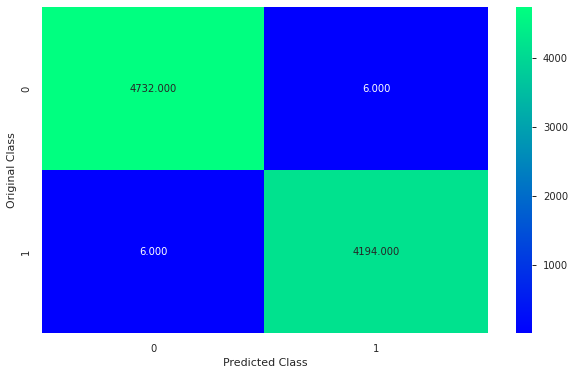

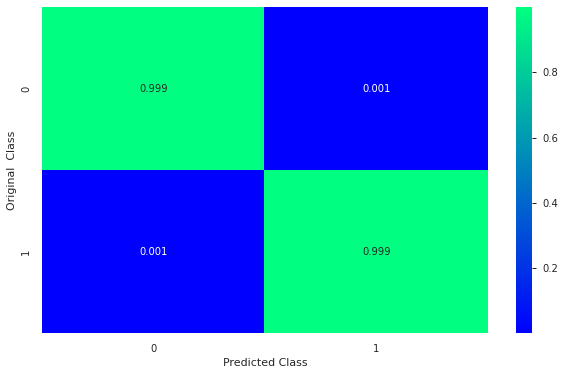

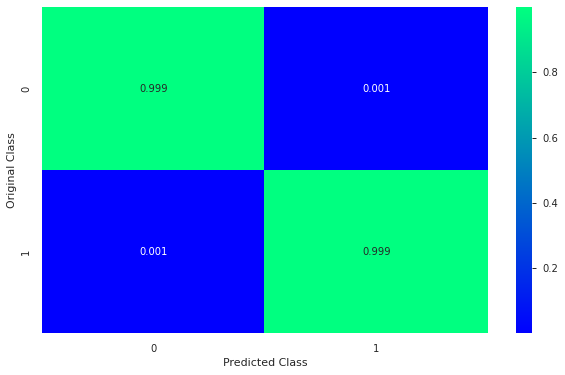

Accuracy :  99.86574177668382


In [41]:
li_svm = SVC(kernel='linear')
li_svm.fit(X_train_bow,Y_train)

train_pred = li_svm.predict(X_train_bow)
print("The train loss is : ",log_loss(Y_train,train_pred))

test_pred = li_svm.predict(X_test_bow)
print("The test loss is : ",log_loss(Y_test,test_pred))

plot_conf_matrix(Y_test,test_pred)
print("Accuracy : ",accuracy_score(Y_test,test_pred)*100)

summary.append(("Linear SVM with BOW",accuracy_score(Y_test,test_pred)*100))

With TF-IDF encoding of text:

The train loss is :  0.004830530076553935
The test loss is :  0.08501439671851145


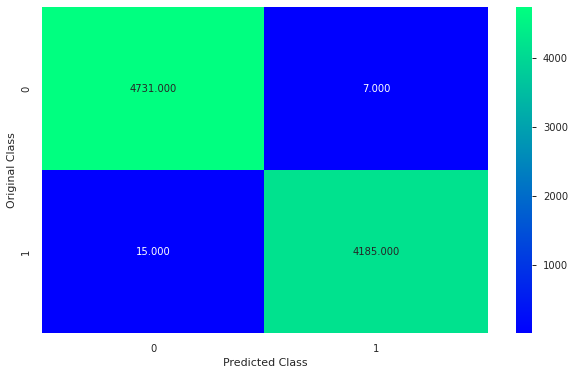

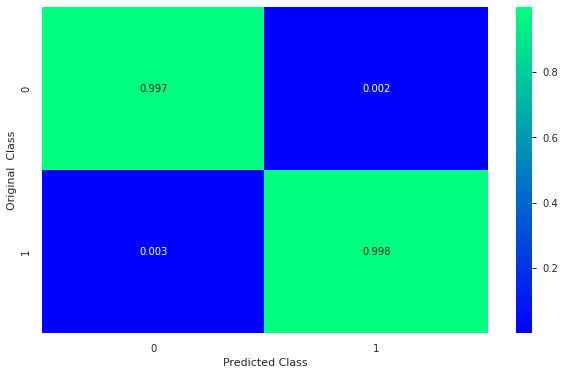

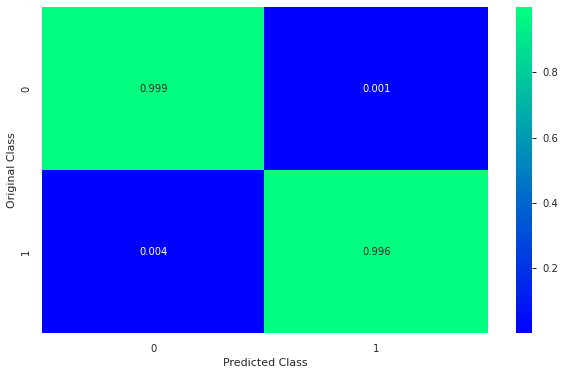

Accuracy :  99.75385992392034


In [42]:
li_svm = SVC(kernel='linear')
li_svm.fit(X_train_tfidf,Y_traint)

train_pred = li_svm.predict(X_train_tfidf)
print("The train loss is : ",log_loss(Y_traint,train_pred))

test_pred = li_svm.predict(X_test_tfidf)
print("The test loss is : ",log_loss(Y_testt,test_pred))

plot_conf_matrix(Y_testt,test_pred)
print("Accuracy : ",accuracy_score(Y_testt,test_pred)*100)

summary.append(("Linear SVM with TF-IDF",accuracy_score(Y_testt,test_pred)*100))

* ### Passive Aggressive Classifier

With Bag of words encoding of text :

The train loss is :  9.992007221626413e-16
The test loss is :  0.10433570819474251


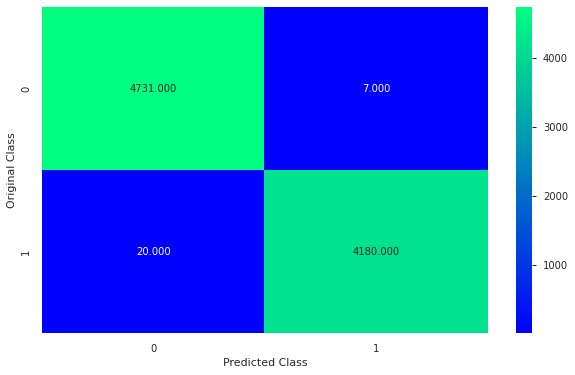

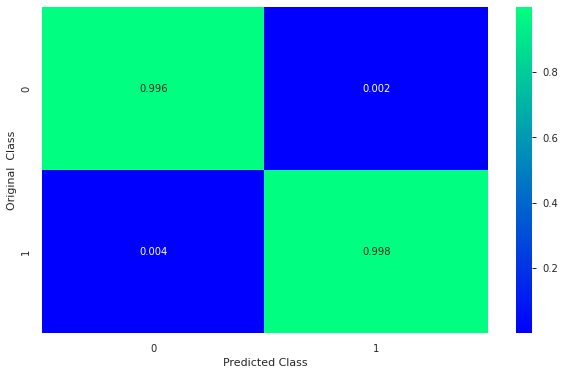

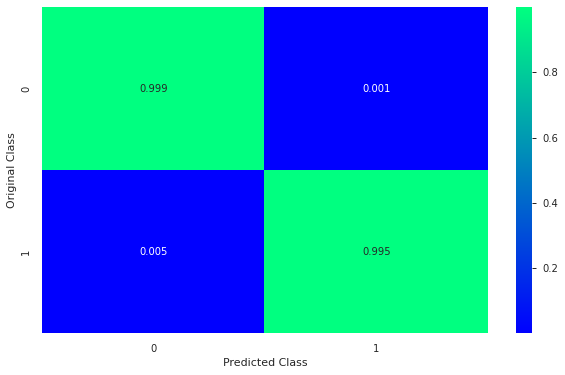

Accuracy : 99.69791899753861


In [47]:
pac= PassiveAggressiveClassifier(max_iter=100)
pac.fit(X_train_bow,Y_train)

train_pred = pac.predict(X_train_bow)
print("The train loss is : ",log_loss(Y_train,train_pred))

test_pred = pac.predict(X_test_bow)
print("The test loss is : ",log_loss(Y_test,test_pred))

plot_conf_matrix(Y_test,test_pred)
print("Accuracy :",accuracy_score(Y_test,test_pred)*100)

summary.append(("Passive-Aggressive Classifier with BOW",pac.score(X_test_bow,Y_test)*100))

With TF-IDF encoding of text :

The train loss is :  9.992007221626413e-16
The test loss is :  0.07728569320713509


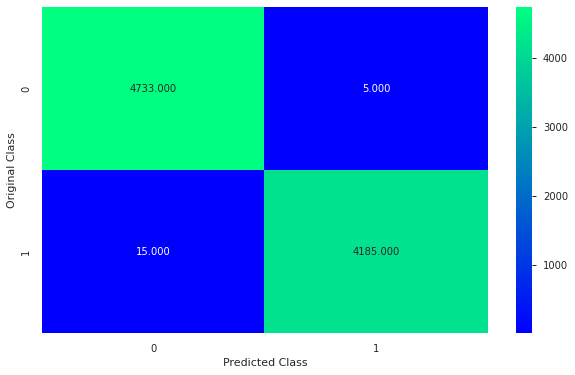

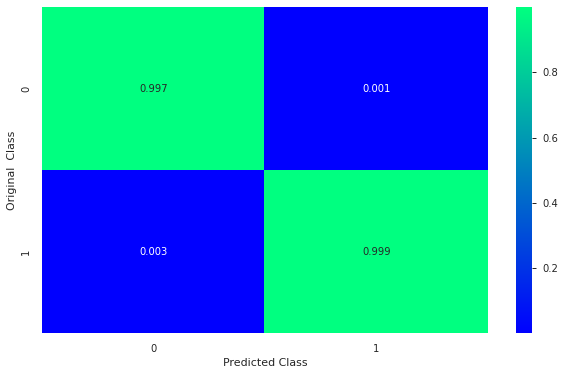

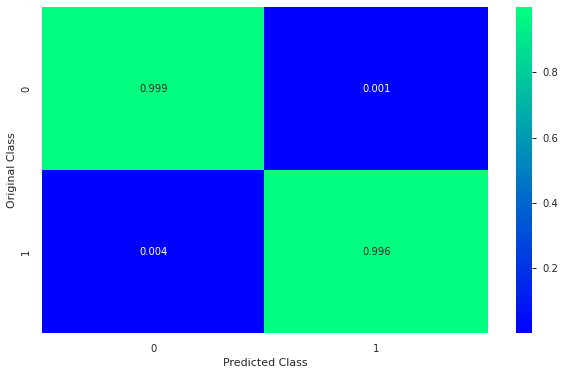

Accuracy : 99.77623629447304


In [48]:
pac= PassiveAggressiveClassifier(max_iter=100)
pac.fit(X_train_tfidf,Y_traint)

train_pred = pac.predict(X_train_tfidf)
print("The train loss is : ",log_loss(Y_traint,train_pred))

test_pred = pac.predict(X_test_tfidf)
print("The test loss is : ",log_loss(Y_testt,test_pred))

plot_conf_matrix(Y_testt,test_pred)
print("Accuracy :",accuracy_score(Y_testt,test_pred)*100)

summary.append(("Passive-Aggressive Classifier with TF-IDF",pac.score(X_test_tfidf,Y_test)*100))

## Summary of all the Models:

In [49]:
print("Summary :")
print("        Model                         ACCURACY  ")
for i in range(len(summary)):
    print(summary[i])

Summary :
        Model                         ACCURACY  
('Logistic Regression with BoW ', 99.80980085030208)
('Logistic Regression with TF-IDF', 98.94831058402328)
('Random Forest with BoW ', 99.14969791899753)
('Random Forest with TF-IDF', 99.21682703065564)
('Linear SVM with BOW', 99.86574177668382)
('Linear SVM with TF-IDF', 99.75385992392034)
('SGD Classifier with BOW', 99.70910718281495)
('SGD Classifier with TF-IDF', 99.76504810919668)
('Passive-Aggressive Classifier with BOW', 99.69791899753861)
('Passive-Aggressive Classifier with TF-IDF', 99.77623629447304)


SO WE GET ***HIGHEST ACCURACY*** OF **99.86% BY USING LINEAR SVM WITH BOW** AND **99.8% BY USING LOGISTIC REGRESSION WITH BOW.**

ALL THE ABOVE USED ML MODELS HAVE GIVEN QUITE GOOD RESULTS OF ALMOST 99% ACCURACY IN ALL THE MODELS.